In [243]:
import zipfile

In [244]:
with zipfile.ZipFile('Reviews.csv.zip','r') as zip_ref:
    zip_ref.extractall()

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [272]:
df = pd.read_csv("C:\\Users\\01pra\\Reviews.csv")
print(df.shape)
df = df.head(100000)
print(df.shape)

(568454, 10)
(100000, 10)


In [273]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


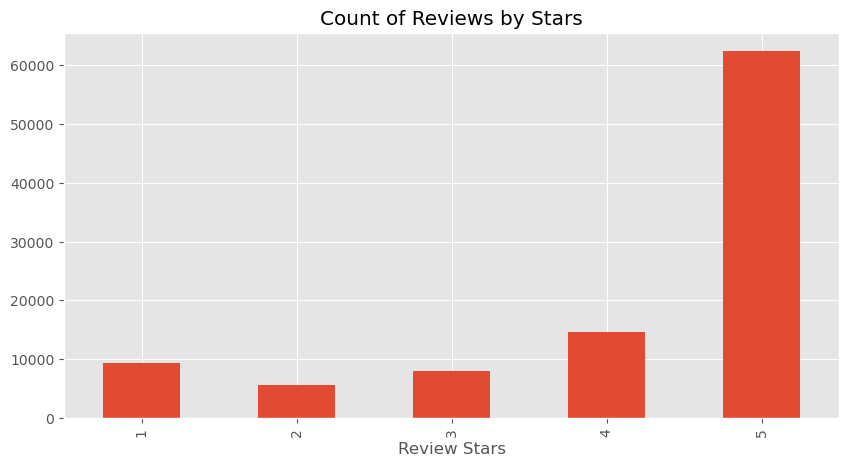

In [275]:
ax = df['Score'].value_counts().sort_index()\
        .plot(kind = 'bar', 
              title = 'Count of Reviews by Stars', 
              figsize = (10,5))
ax.set_xlabel("Review Stars")
plt.show()

In [276]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\01pra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [277]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [278]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [279]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [280]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [281]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [282]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


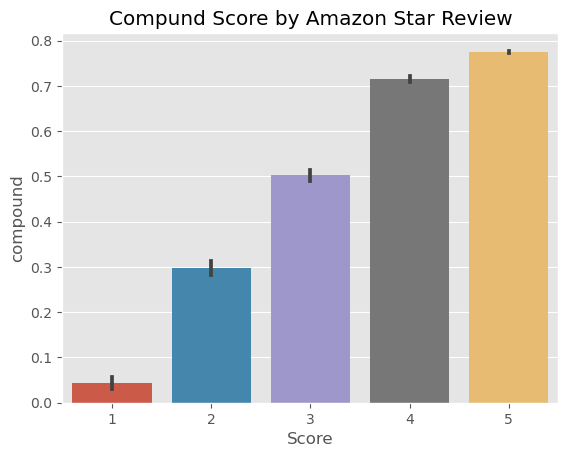

In [283]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

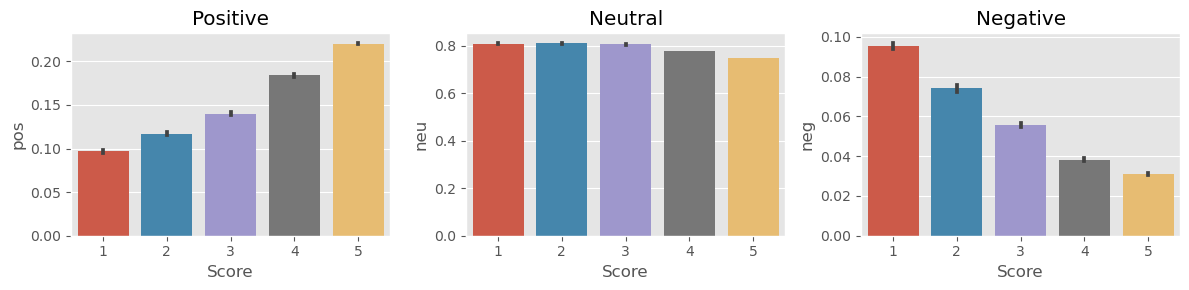

In [284]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [285]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [286]:
def rating_to_label(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

In [287]:
df['true_sentiment'] = df['Score'].apply(rating_to_label)

In [288]:
def vader_sentiment_to_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [289]:
vaders['predicted_sentiment'] = vaders['compound'].apply(vader_sentiment_to_label)
accuracy = accuracy_score(df['true_sentiment'], vaders['predicted_sentiment'])
precision, recall, f1, _ = precision_recall_fscore_support(df['true_sentiment'], vaders['predicted_sentiment'], average='weighted')
conf_matrix = confusion_matrix(df['true_sentiment'], vaders['predicted_sentiment'])

In [290]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.79002
Precision: 0.7362528369515478
Recall: 0.79002
F1 Score: 0.7556701624072609
Confusion Matrix:
[[ 5872   722  8292]
 [ 1376   281  6402]
 [ 3159  1047 72849]]


In [232]:
pip install vaderSentiment spacy

Note: you may need to restart the kernel to use updated packages.


In [233]:
import spacy

!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 187.0 kB/s eta 0:01:09
     --------------------------------------- 0.1/12.8 MB 193.2 kB/s eta 0:01:06
     --------------------------------------- 0.1/12.8 MB 218.5 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 249.8 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 277.4 kB/s eta 

In [234]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [235]:
import time
import nltk

In [236]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\01pra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\01pra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\01pra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [237]:
nlp = spacy.load('en_core_web_sm')
nltk_lemmatizer = WordNetLemmatizer()

In [239]:
df = pd.read_csv("C:\\Users\\01pra\\Reviews.csv")
print(df.shape)
df = df.head(100000)
print(df.shape)

(568454, 10)
(100000, 10)


In [240]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [241]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    doc = nlp(' '.join(filtered_tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [242]:
tqdm.pandas()
df['lemmatized_text'] = df['Text'].progress_apply(tokenize_and_lemmatize)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [245]:
analyzer = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['lemmatized_text'].apply(lambda text: analyzer.polarity_scores(text))
df['negative_scores'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neg'])
df['neutral_scores'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neu'])
df['positive_scores'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['pos'])
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

In [246]:
df['Id'] = df.index
vaders = pd.DataFrame(df.head(50000))
vaders['Id'] = vaders['Id'].astype(int)
df['Id'] = df['Id'].astype(int)
vaders = vaders.merge(df, on='Id', how='left')
pd.DataFrame(vaders)

,Id,ProductId_x,UserId_x,ProfileName_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,Score_x,Time_x,Summary_x,Text_x,...,Score_y,Time_y,Summary_y,Text_y,lemmatized_text_y,sentiment_scores_y,negative_scores_y,neutral_scores_y,positive_scores_y,compound_score_y
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,buy several Vitality can dog food product find...,"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...",0.000,0.578,0.422,0.9118
1,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrive label Jumbo Salted Peanuts ... ...,"{'neg': 0.1, 'neu': 0.815, 'pos': 0.085, 'comp...",0.100,0.815,0.085,-0.1027
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"confection around century . light , pillowy ci...","{'neg': 0.127, 'neu': 0.664, 'pos': 0.209, 'co...",0.127,0.664,0.209,0.7926
3,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,...,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,look secret ingredient Robitussin believe find...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.000,0.884,0.116,0.4404
4,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price . wide assortment yumm...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.000,0.476,0.524,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...,...,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...,sister introduce . become favorite carry aroun...,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.000,0.672,0.328,0.9279
49996,49996,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...,...,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...,friend recommend bar fall love ! great price (...,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.000,0.423,0.577,0.9835
49997,49997,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...,...,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...,fabulous ! take one work every day . feel depr...,"{'neg': 0.162, 'neu': 0.629, 'pos': 0.209, 'co...",0.162,0.629,0.209,0.2225
49998,49998,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...,...,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...,"love bar continue buy , beware occasionally co...","{'neg': 0.061, 'neu': 0.693, 'pos': 0.247, 'co...",0.061,0.693,0.247,0.6486


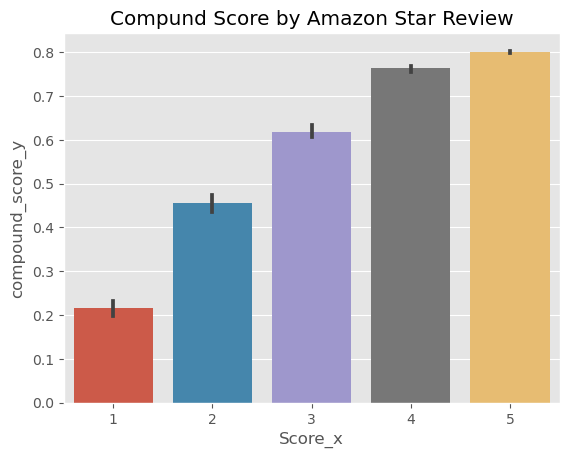

In [247]:
ax = sns.barplot(data=vaders, x='Score_x', y='compound_score_y')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

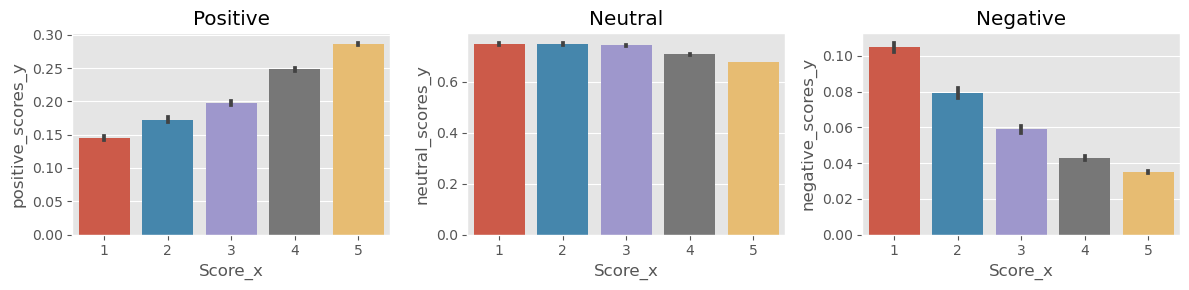

In [248]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score_x', y='positive_scores_y', ax=axs[0])
sns.barplot(data=vaders, x='Score_x', y='neutral_scores_y', ax=axs[1])
sns.barplot(data=vaders, x='Score_x', y='negative_scores_y', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [249]:
vaders.query('Score_x == 1') \
    .sort_values('positive_scores_y', ascending=False)['Text_y'].values[0]

"I was so hoping she would like this because it is so healthy and would be easy to take camping and out to dinner...but she wouldn't eat any of it and kept spitting it out. I gave it to the dogs and they loved it and I am sure it is healthy for them!"

In [250]:
vaders.query('Score_x == 5') \
    .sort_values('negative_scores_y', ascending=False)['Text_y'].values[0]

'The only negative is I will have to pay TN sales tax at the end of the year, but that is not a fault of the merchant.'

In [251]:
vaders.query('Score_x == 1') \
    .sort_values('positive_scores_y', ascending=False)['Text_y'].values[1]

'These are not the greatest.  Thought they would be great to have on hand when guest come.  Not so.  They were not what I had expected.'

In [252]:
vaders.query('Score_x == 1') \
    .sort_values('positive_scores_y', ascending=False)['Text_y'].values[2]

'be careful...even though this is listed under gluten free section it is NOT gluten free'

In [253]:
vaders.query('Score_x == 1') \
    .sort_values('positive_scores_y', ascending=False)['Text_y'].values[3]

'I wanted to love these. But they were so salty that it was impossible to enjoy them. Were Bugles this salty years ago or did they increase the salt in them?'

In [254]:
vaders.query('Score_x == 5') \
    .sort_values('negative_scores_y', ascending=False)['Text_y'].values[1]

'It has gotten so bad in our household that we have to hide the bag from ourselves. We never miss a week without having a bag of these treats on hand. It has gotten worse because now we can find the chocholate pomegrantes even at Walgreens! Help! They are shamefully delicious and impossible to avoid.'

In [255]:
vaders.query('Score_x == 5') \
    .sort_values('negative_scores_y', ascending=False)['Text_y'].values[2]

"I'm too poor to own a car, but not too poor to order wheatgrass on the internet. Is that irony? Depends!"

In [256]:
vaders.query('Score_x == 5') \
    .sort_values('negative_scores_y', ascending=False)['Text_y'].values[3]

'great to email to friends in rehab for eating disorders who are banned from having gum and its supper sneaky'

In [257]:
vaders.query('Score_x == 5') \
    .sort_values('negative_scores_y', ascending=False)['Text_y'].values[4]

'low salt and tasty is difficult for cracker manufacturers. Ryvita has solved that problem with a bunch of fiber to boot.'

In [258]:
vaders.query('Score_x == 1').sort_values('positive_scores_y', ascending=False)

,Id,ProductId_x,UserId_x,ProfileName_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,Score_x,Time_x,Summary_x,Text_x,...,Score_y,Time_y,Summary_y,Text_y,lemmatized_text_y,sentiment_scores_y,negative_scores_y,neutral_scores_y,positive_scores_y,compound_score_y
19698,19698,B0030VBRIU,A3T4WDFS8S1G1X,jenny brown,0,0,1,1308614400,didn't love it!,I was so hoping she would like this because it...,...,1,1308614400,didn't love it!,I was so hoping she would like this because it...,hope would like healthy would easy take campin...,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.000,0.423,0.577,0.9612
4638,4638,B000FFRY3G,A2NO0JUPSREQ2C,Barbara,7,14,1,1161388800,English Muffins???????????,These are not the greatest. Thought they woul...,...,1,1161388800,English Muffins???????????,These are not the greatest. Thought they woul...,greatest . Thought would great hand guest come...,"{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'comp...",0.000,0.439,0.561,0.9100
6503,6503,B000FNEX50,A2CF4ZYYQWQ7PB,jg,1,2,1,1255564800,not gluten free,be careful...even though this is listed under ...,...,1,1255564800,not gluten free,be careful...even though this is listed under ...,careful ... even though list gluten free secti...,"{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'comp...",0.000,0.461,0.539,0.8020
40425,40425,B0032GHM4G,A3JRKGMYF3F09Z,naware,0,0,1,1343606400,Too salty,I wanted to love these. But they were so salty...,...,1,1343606400,Too salty,I wanted to love these. But they were so salty...,want love . salty impossible enjoy . bugle sal...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.000,0.476,0.524,0.8750
17159,17159,B003VVL8NS,AN5CI6I2NDZD1,Kristin Graves,0,0,1,1311292800,"Poor quality,but good service.","The taffy was not good. Seemed to be old, som...",...,1,1311292800,"Poor quality,but good service.","The taffy was not good. Seemed to be old, som...","taffy good . seemed old , somewhat sponge like...","{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'comp...",0.000,0.477,0.523,0.9374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19311,19311,B0017TI73K,A2O44NT8H097D0,Claude P. Proteau,0,1,1,1243641600,Awful price,"I just bought this item, 30-May-09, at my loca...",...,1,1243641600,Awful price,"I just bought this item, 30-May-09, at my loca...","buy item , 30 - May-09 , local supermarket $ 4...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
19095,19095,B003SBRUC4,A1D0IH4JLVH2PC,"UPS ""baby delivery""",3,5,1,1285113600,No Good!,"Tart, bitter aftertaste, horrible diet rootbee...",...,1,1285113600,No Good!,"Tart, bitter aftertaste, horrible diet rootbee...","tart , bitter aftertaste , horrible diet rootb...","{'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'comp...",0.359,0.641,0.000,-0.8777
18841,18841,B001PO7FIU,A2340LYW7PDOA3,Paula Prose,0,11,1,1309910400,I never received this product!,I ordered this over a month ago and have not r...,...,1,1309910400,I never received this product!,I ordered this over a month ago and have not r...,order month ago receive product receive answer...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
18628,18628,B00008JOL0,A3THEEZ55XYMJ6,ej76az,0,2,1,1323648000,dog refused,My dog refused to eat any of these. I had to ...,...,1,1323648000,dog refused,My dog refused to eat any of these. I had to ...,dog refuse eat . give away . beware dog picky .,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",0.180,0.820,0.000,-0.2960


In [259]:
vaders.query('Score_x == 5').sort_values('negative_scores_y', ascending=False)

,Id,ProductId_x,UserId_x,ProfileName_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,Score_x,Time_x,Summary_x,Text_x,...,Score_y,Time_y,Summary_y,Text_y,lemmatized_text_y,sentiment_scores_y,negative_scores_y,neutral_scores_y,positive_scores_y,compound_score_y
41461,41461,B003OZYTY6,AESKKSDX6FPRU,"L. Knight ""Deep South Vegetarian :&#62;~""",0,0,5,1349136000,"I love this tea, costs much less here than at ...",The only negative is I will have to pay TN sal...,...,5,1349136000,"I love this tea, costs much less here than at ...",The only negative is I will have to pay TN sal...,"negative pay TN sale tax end year , fault merc...","{'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'comp...",0.494,0.506,0.000,-0.7783
37646,37646,B002R81L92,AV3TVVW95CJ5K,familiaintl,1,1,5,1305849600,Outstanding,It has gotten so bad in our household that we ...,...,5,1305849600,Outstanding,It has gotten so bad in our household that we ...,get bad household hide bag . never miss week w...,"{'neg': 0.418, 'neu': 0.412, 'pos': 0.17, 'com...",0.418,0.412,0.170,-0.8867
39840,39840,B000E7QYNG,A24YPWMTHDWISQ,Matt W,1,2,5,1329955200,Bag of seeds quite the deal if you don't have ...,"I'm too poor to own a car, but not too poor to...",...,5,1329955200,Bag of seeds quite the deal if you don't have ...,"I'm too poor to own a car, but not too poor to...","' m poor car , poor order wheatgrass internet ...","{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",0.412,0.588,0.000,-0.7712
33801,33801,B000JZ9ATS,A2MV3MCROVP6PW,B. Aibel,2,10,5,1216944000,yay,great to email to friends in rehab for eating ...,...,5,1216944000,yay,great to email to friends in rehab for eating ...,great email friend rehab eat disorder ban gum ...,"{'neg': 0.4, 'neu': 0.244, 'pos': 0.356, 'comp...",0.400,0.244,0.356,0.0258
31337,31337,B000FDMMVM,A2XBQM9IP6PUM3,Lawrence J. Fitzpatrick,0,0,5,1260576000,tasty,low salt and tasty is difficult for cracker ma...,...,5,1260576000,tasty,low salt and tasty is difficult for cracker ma...,low salt tasty difficult cracker manufacturer ...,"{'neg': 0.382, 'neu': 0.524, 'pos': 0.094, 'co...",0.382,0.524,0.094,-0.6705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,22395,B001HTJ49G,A16ADGGD2C06PY,hfarnz,0,0,5,1324944000,love them!,We love these pretzels. They taste like normal...,...,5,1324944000,love them!,We love these pretzels. They taste like normal...,love pretzel . taste like normal white pretzel...,"{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",0.000,0.696,0.304,0.8625
22393,22393,B001HTJ49G,A2WSAGFJSQC1YF,Crease in the Page,0,0,5,1325030400,Need to know how long they are? How many in e...,"These taste great, and when I got them very fe...",...,5,1325030400,Need to know how long they are? How many in e...,"These taste great, and when I got them very fe...","taste great , get break ... average one pretze...","{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...",0.000,0.815,0.185,0.9349
22392,22392,B001HTJ49G,A3699F5IARONN1,Candice H. Greene,0,0,5,1325894400,Spelt pretzels with mustard - YUMMY!,We buy the organic spelt pretzels by Newman's ...,...,5,1325894400,Spelt pretzels with mustard - YUMMY!,We buy the organic spelt pretzels by Newman's ...,buy organic spelt pretzel Newman 's . company ...,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.000,0.709,0.291,0.9656
22391,22391,B001HTJ49G,A265B1IZE5RVG6,internetshopper72,0,0,5,1329609600,Yummy!,We love these pretzels. Appreciate the long e...,...,5,1329609600,Yummy!,We love these pretzels. Appreciate the long e...,love pretzel . appreciate long expiration date...,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.000,0.571,0.429,0.9060


In [260]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [261]:
def rating_to_label(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

In [262]:
print("Column Names:", df.columns)

Column Names: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'lemmatized_text', 'sentiment_scores', 'negative_scores',
       'neutral_scores', 'positive_scores', 'compound_score'],
      dtype='object')


In [263]:
df['true_sentiment'] = df['Score'].apply(rating_to_label)

In [264]:
def vader_sentiment_to_label(text):
    score = analyzer.polarity_scores(text)['compound_score']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [265]:
def get_predicted_sentiment(scores):
    compound_score = scores['compound']
    
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [266]:
df['predicted_sentiment'] = df['sentiment_scores'].apply(get_predicted_sentiment)
accuracy = accuracy_score(df['true_sentiment'], df['predicted_sentiment'])
precision, recall, f1, _ = precision_recall_fscore_support(df['true_sentiment'], df['predicted_sentiment'], average='weighted')
conf_matrix = confusion_matrix(df['true_sentiment'], df['predicted_sentiment'])

In [274]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.78595
Precision: 0.7245859377694618
Recall: 0.78595
F1 Score: 0.7394789646294031
Confusion Matrix:
[[ 4172   668 10046]
 [  829   204  7026]
 [ 2029   807 74219]]


In [ ]:
#df['predicted_sentiment'] = df['text'].apply(vader_sentiment_to_label)
#accuracy = accuracy_score(df['true_sentiment'], df['predicted_sentiment'])
#precision, recall, f1, _ = precision_recall_fscore_support(df['true_sentiment'], df['predicted_sentiment'], average='weighted')
#conf_matrix = confusion_matrix(df['true_sentiment'], df['predicted_sentiment'])
#print(f"Accuracy: {accuracy}")
#print(f"Precision: {precision}")
#print(f"Recall: {recall}")
#print(f"F1 Score: {f1}")
#print(conf_matrix)